# **Imports**

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Import**

In [ ]:
trans = pd.read_csv('/content/drive/MyDrive/Datasets/Final Project/HI-Small_Trans.csv')
accounts = pd.read_csv('/content/drive/MyDrive/Datasets/Final Project/HI-Small_accounts.csv')

# **Exploratory Data Analysis (EDA)**

### **Transactions**

In [ ]:
print("\nFirst 5 rows:")
print(trans.head())

print("\nColumns available:")
print(trans.columns.tolist())

print("\nData types:")
print(trans.dtypes)

print("\nNullvalues:")
print(trans.isnull().sum())

print("\nBasic stats:")
print(trans.describe())


First 5 rows:
          Timestamp  From Bank    Account  To Bank  Account.1  \
0  2022/09/01 00:20         10  8000EBD30       10  8000EBD30   
1  2022/09/01 00:20       3208  8000F4580        1  8000F5340   
2  2022/09/01 00:00       3209  8000F4670     3209  8000F4670   
3  2022/09/01 00:02         12  8000F5030       12  8000F5030   
4  2022/09/01 00:06         10  8000F5200       10  8000F5200   

   Amount Received Receiving Currency  Amount Paid Payment Currency  \
0          3697.34          US Dollar      3697.34        US Dollar   
1             0.01          US Dollar         0.01        US Dollar   
2         14675.57          US Dollar     14675.57        US Dollar   
3          2806.97          US Dollar      2806.97        US Dollar   
4         36682.97          US Dollar     36682.97        US Dollar   

  Payment Format  Is Laundering  
0   Reinvestment              0  
1         Cheque              0  
2   Reinvestment              0  
3   Reinvestment              0

### **Accounts**

In [ ]:
print("\nFirst 5 rows:")
print(accounts.head())

print("\nColumns available:")
print(accounts.columns.tolist())

print("\nData types:")
print(accounts.dtypes)

print("\nNullvalues:")
print(accounts.isnull().sum())


First 5 rows:
                     Bank Name  Bank ID Account Number  Entity ID  \
0          Portugal Bank #4507   331579      80B779D80  80062E240   
1              Canada Bank #27      210      809D86900  800C998A0   
2                  UK Bank #33    21884      80812BE00  800C47F50   
3           Germany Bank #4815    32742      81047F300  80096F0B0   
4  National Bank of Harrisburg   127390      80BD8CF00  800FB8760   

                  Entity Name  
0  Sole Proprietorship #50438  
1          Corporation #33520  
2          Partnership #35397  
3          Corporation #48813  
4            Corporation #889  

Columns available:
['Bank Name', 'Bank ID', 'Account Number', 'Entity ID', 'Entity Name']

Data types:
Bank Name         object
Bank ID            int64
Account Number    object
Entity ID         object
Entity Name       object
dtype: object

Nullvalues:
Bank Name         0
Bank ID           0
Account Number    0
Entity ID         0
Entity Name       0
dtype: int64


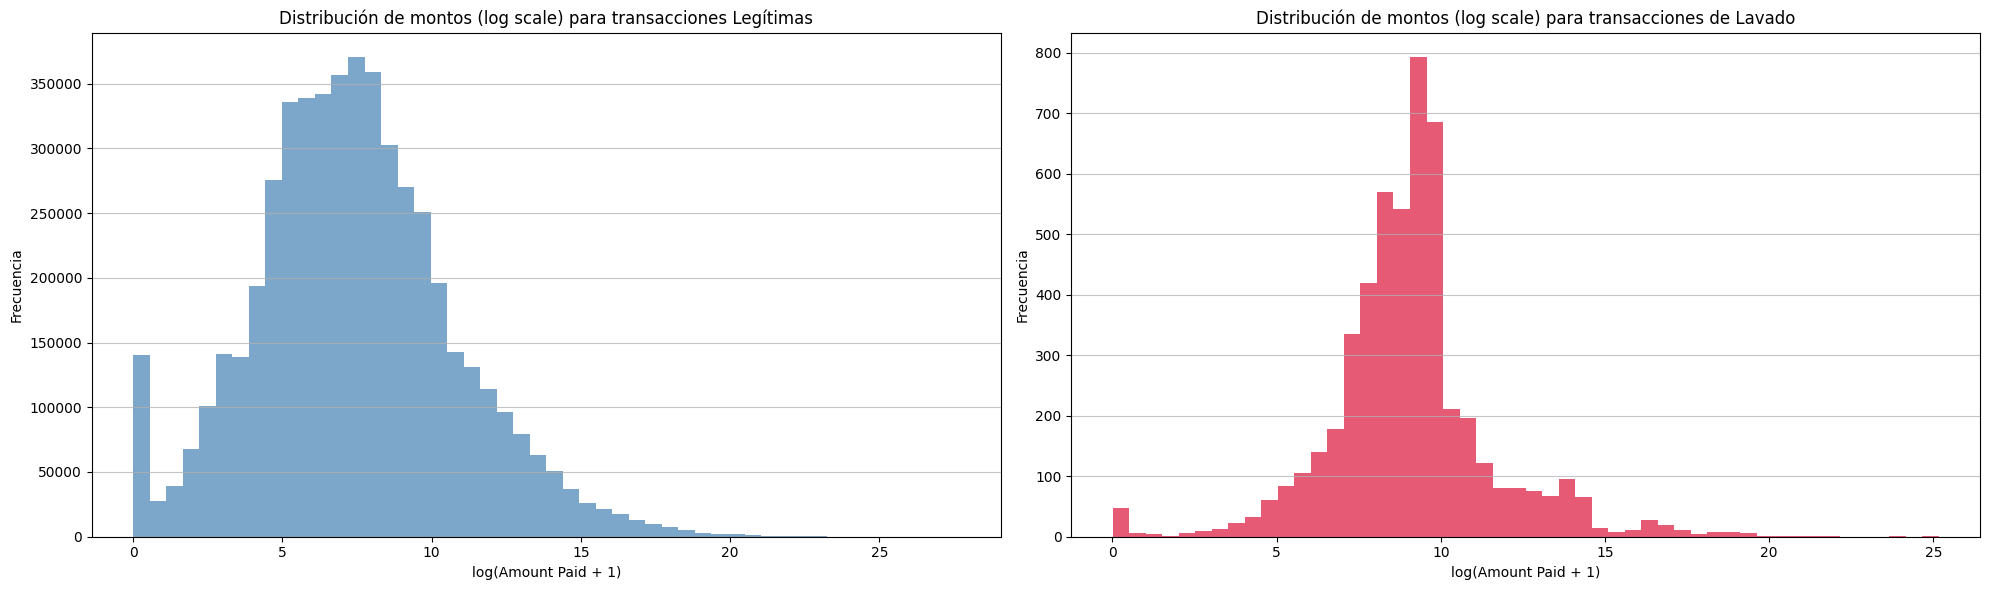

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Separate data for legitimate transactions
legit_amounts = trans[trans['Is Laundering'] == 0]['Amount Paid']

# Plot histogram for legitimate transactions in the first subplot
axes[0].hist(np.log1p(legit_amounts), bins=50, color='steelblue', alpha=0.7)
axes[0].set_title('Distribución de montos (log scale) para transacciones Legítimas')
axes[0].set_xlabel('log(Amount Paid + 1)')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(axis='y', alpha=0.75)

# Separate data for laundering transactions
fraud_amounts = trans[trans['Is Laundering'] == 1]['Amount Paid']

# Plot histogram for laundering transactions in the second subplot
axes[1].hist(np.log1p(fraud_amounts), bins=50, color='crimson', alpha=0.7)
axes[1].set_title('Distribución de montos (log scale) para transacciones de Lavado')
axes[1].set_xlabel('log(Amount Paid + 1)')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

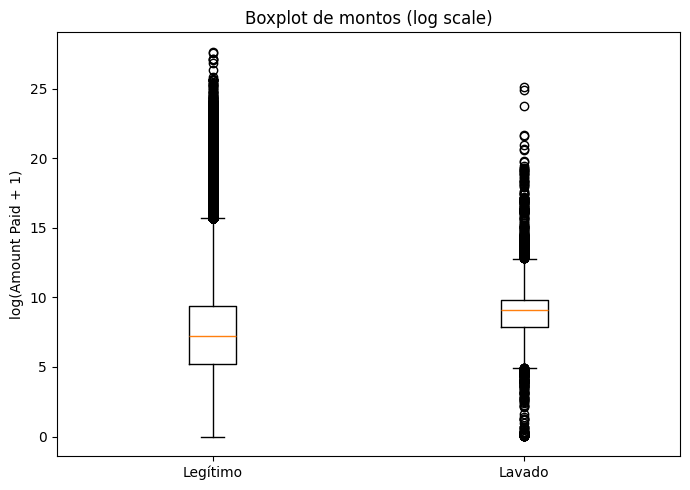

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(7, 5))

# Separar los dos grupos
legit = trans[trans['Is Laundering'] == 0]['Amount Paid']
fraud = trans[trans['Is Laundering'] == 1]['Amount Paid']

# --- Boxplot ---
axes.boxplot([np.log1p(legit), np.log1p(fraud)], tick_labels=['Legítimo', 'Lavado'])
axes.set_title('Boxplot de montos (log scale)')
axes.set_ylabel('log(Amount Paid + 1)')

plt.tight_layout()
plt.show()

In [ ]:
# Stats comparativas
print("\nMontos legítimos:")
print(legit.describe())
print("\nMontos de lavado:")
print(fraud.describe())


Montos legítimos:
count    5.073168e+06
mean     4.477000e+06
std      8.688463e+08
min      1.000000e-06
25%      1.841600e+02
50%      1.410990e+03
75%      1.227934e+04
max      1.046302e+12
Name: Amount Paid, dtype: float64

Montos de lavado:
count    5.177000e+03
mean     3.613531e+07
std      1.527919e+09
min      3.227000e-03
25%      2.634970e+03
50%      8.667210e+03
75%      1.883227e+04
max      8.485314e+10
Name: Amount Paid, dtype: float64


**Tasa de lavado por Payment Format**

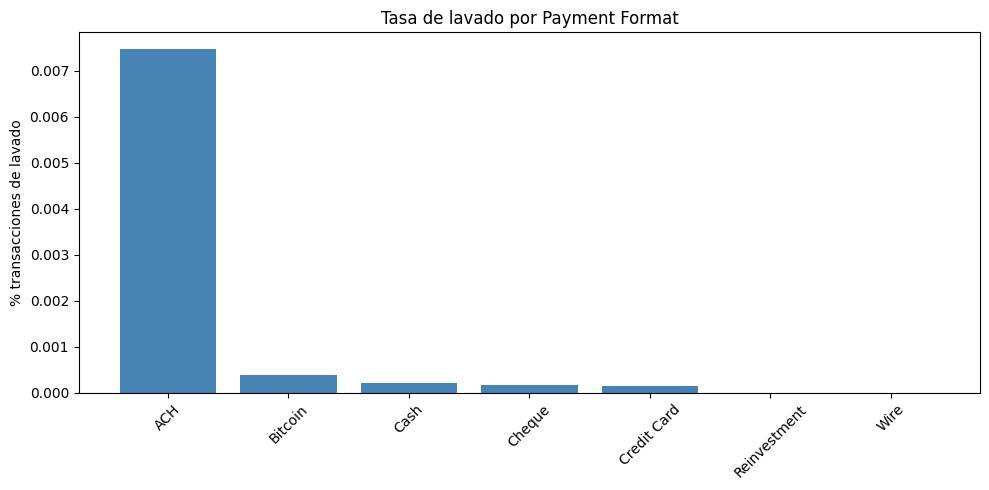

In [ ]:
# --- 1. Tasa de lavado por Payment Format ---
fraud_by_format = trans.groupby('Payment Format')['Is Laundering'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(fraud_by_format.index, fraud_by_format.values, color='steelblue')
plt.title('Tasa de lavado por Payment Format')
plt.ylabel('% transacciones de lavado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Volumen por Payment Format - Legítimo**

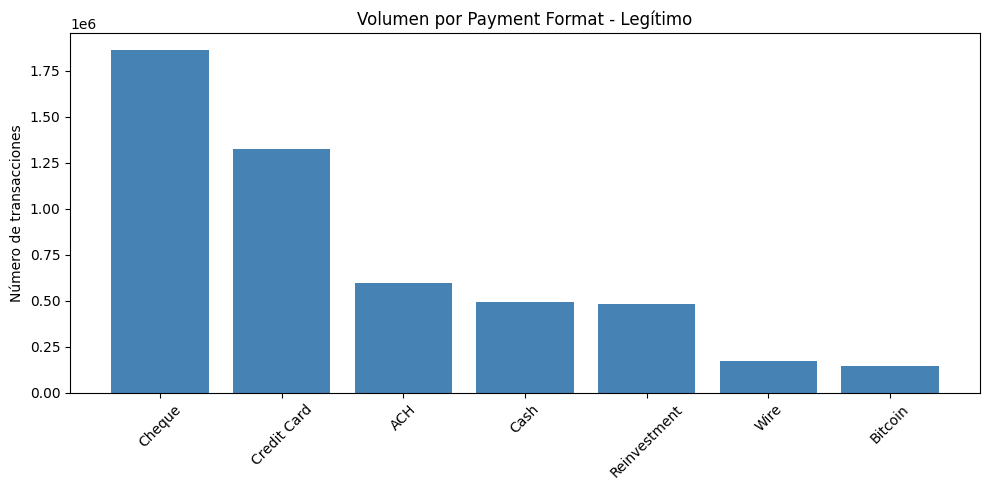

In [ ]:
# --- Volumen por Payment Format - Legítimo ---
format_legit = trans[trans['Is Laundering'] == 0]['Payment Format'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(format_legit.index, format_legit.values, color='steelblue')
plt.title('Volumen por Payment Format - Legítimo')
plt.ylabel('Número de transacciones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Volumen por Payment Format - Lavado**

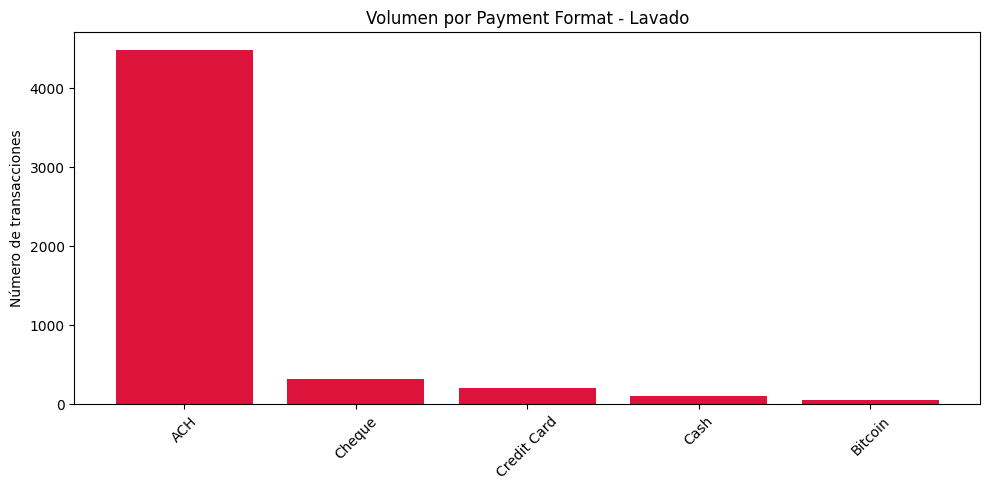

In [ ]:
# --- Volumen por Payment Format - Lavado ---
format_fraud = trans[trans['Is Laundering'] == 1]['Payment Format'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(format_fraud.index, format_fraud.values, color='crimson')
plt.title('Volumen por Payment Format - Lavado')
plt.ylabel('Número de transacciones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Tasa de lavado por Payment Currency**

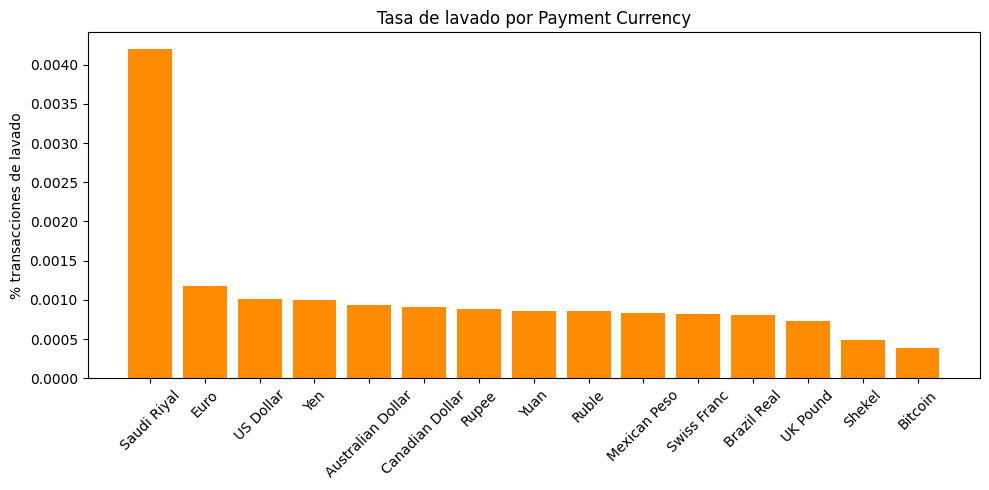

In [ ]:
# --- Tasa de lavado por Payment Currency ---
fraud_by_currency = trans.groupby('Payment Currency')['Is Laundering'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(fraud_by_currency.index, fraud_by_currency.values, color='darkorange')
plt.title('Tasa de lavado por Payment Currency')
plt.ylabel('% transacciones de lavado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Volumen por Currency - Legítimo**

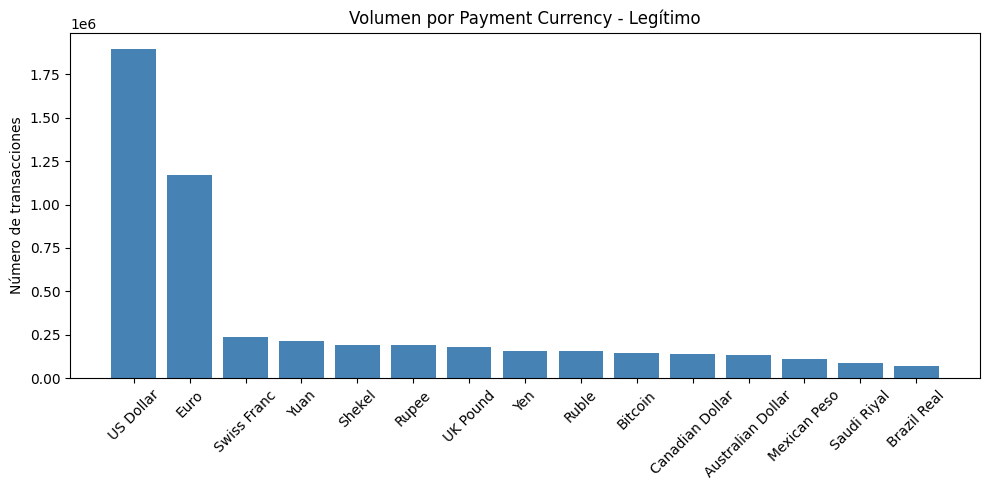

In [ ]:

# --- Volumen por Currency - Legítimo ---
currency_legit = trans[trans['Is Laundering'] == 0]['Payment Currency'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(currency_legit.index, currency_legit.values, color='steelblue')
plt.title('Volumen por Payment Currency - Legítimo')
plt.ylabel('Número de transacciones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Volumen por Currency - Lavado**

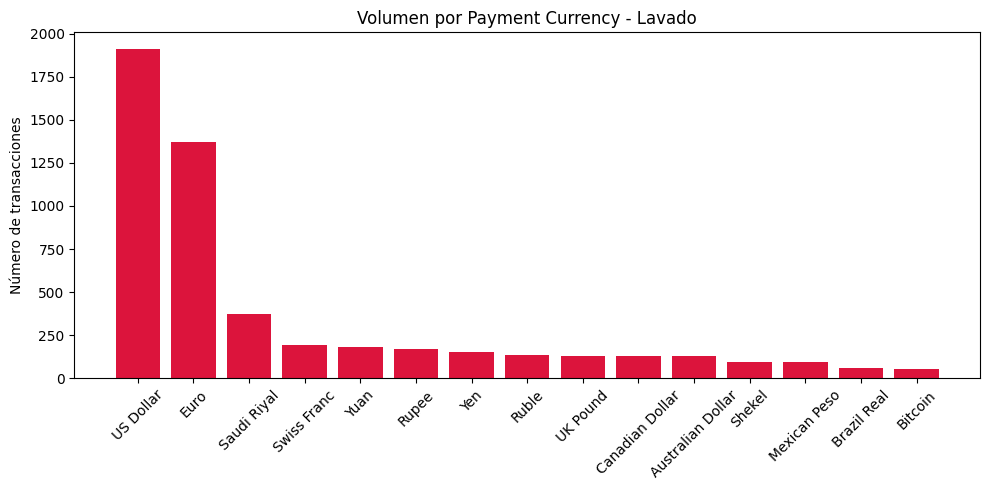

In [ ]:
# --- Volumen por Currency - Lavado ---
currency_fraud = trans[trans['Is Laundering'] == 1]['Payment Currency'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(currency_fraud.index, currency_fraud.values, color='crimson')
plt.title('Volumen por Payment Currency - Lavado')
plt.ylabel('Número de transacciones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Heatmap: Payment Format vs Currency**

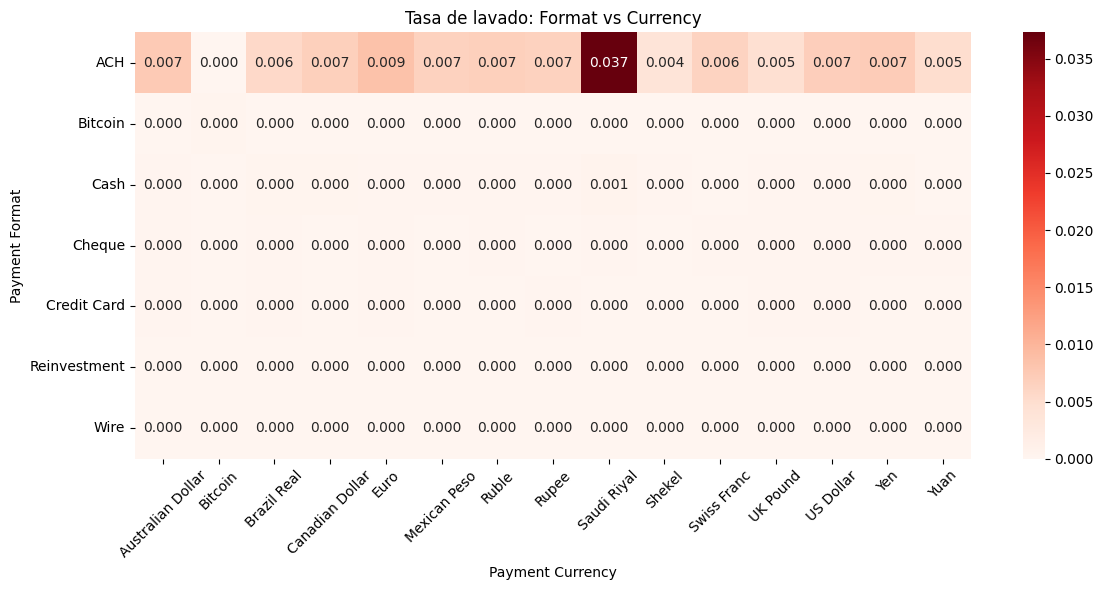

In [ ]:
# --- Heatmap: Payment Format vs Currency ---
pivot = trans.groupby(['Payment Format', 'Payment Currency'])['Is Laundering'].mean().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='Reds', annot=True, fmt='.3f')
plt.title('Tasa de lavado: Format vs Currency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Analisi temporal**

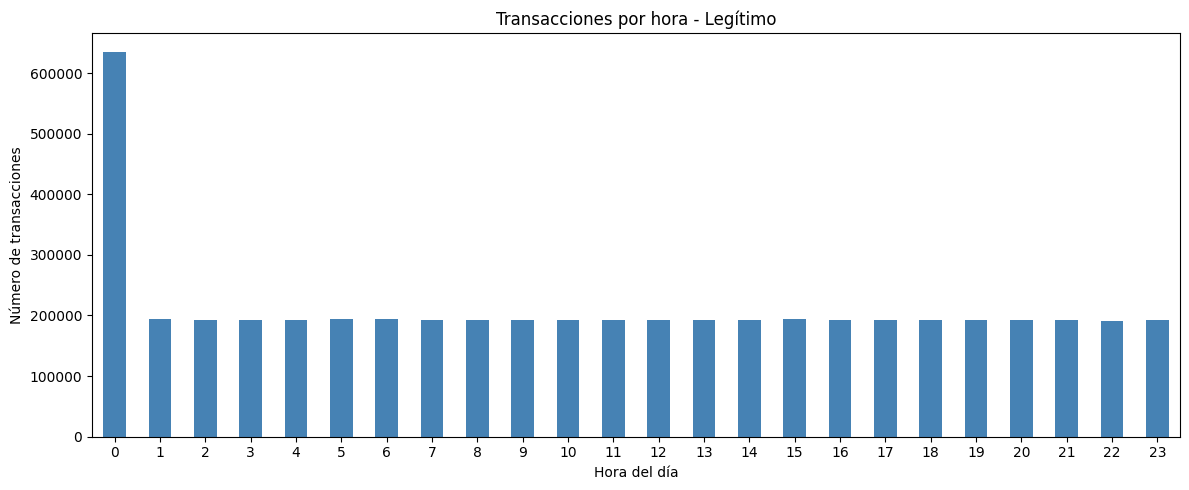

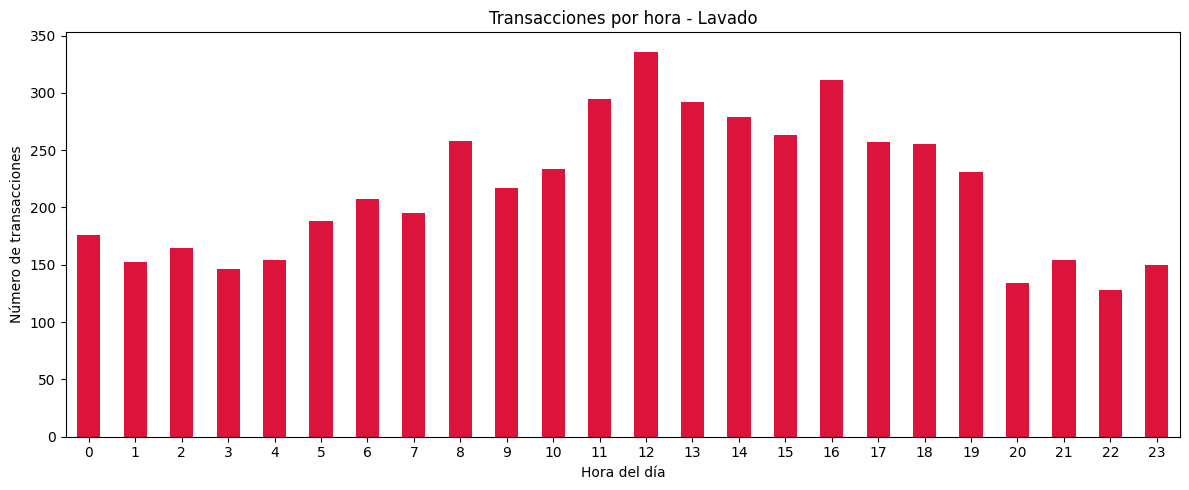

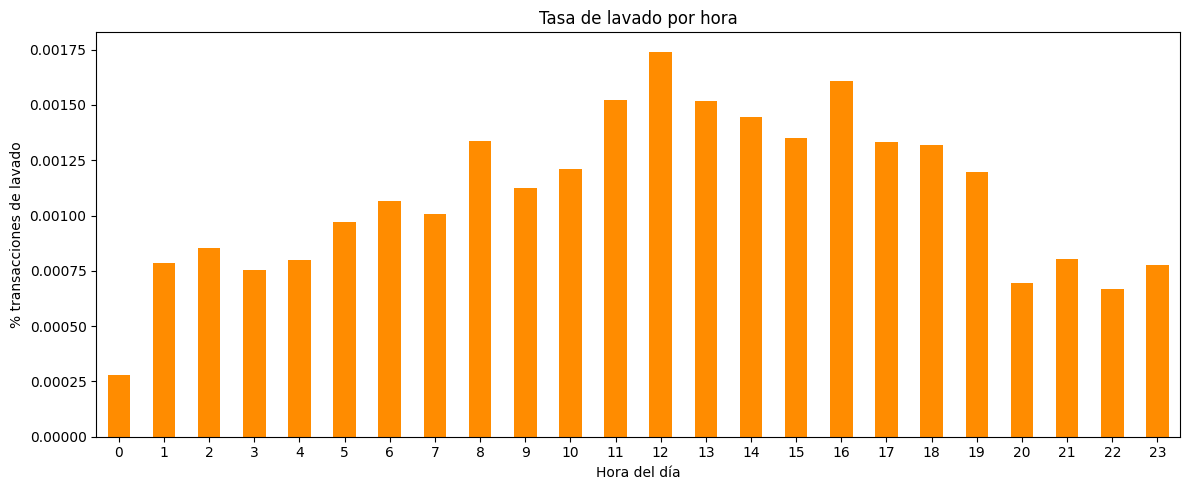

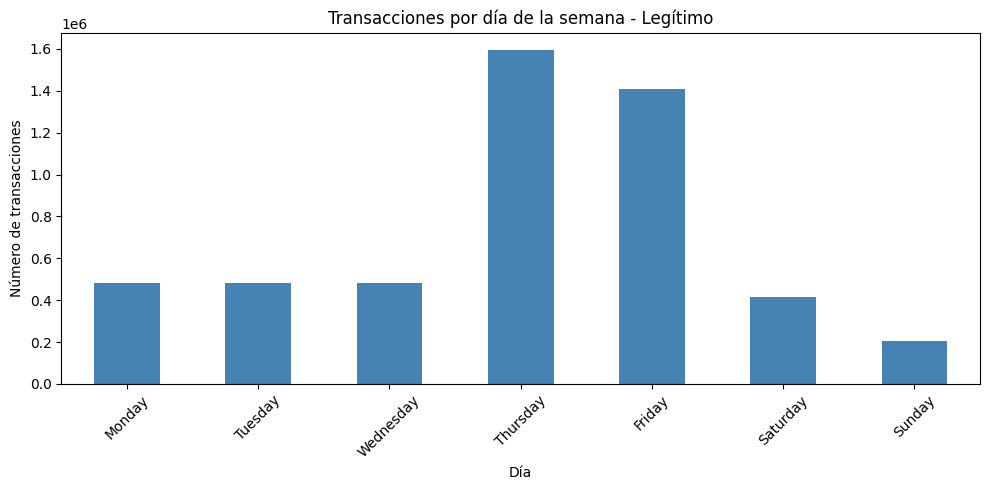

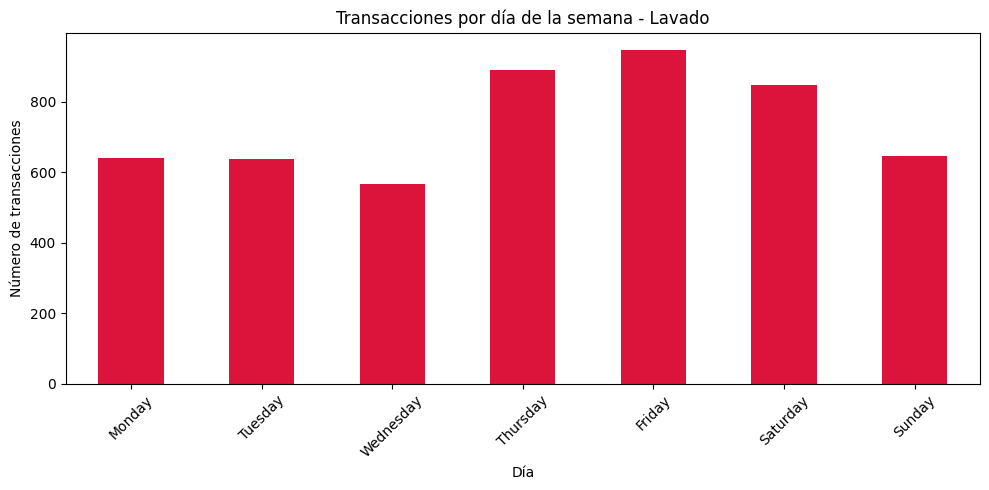

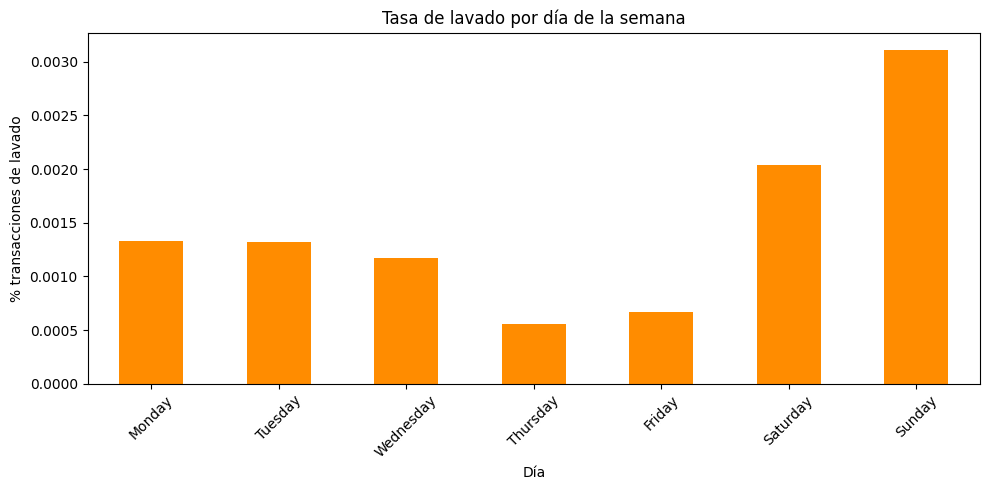

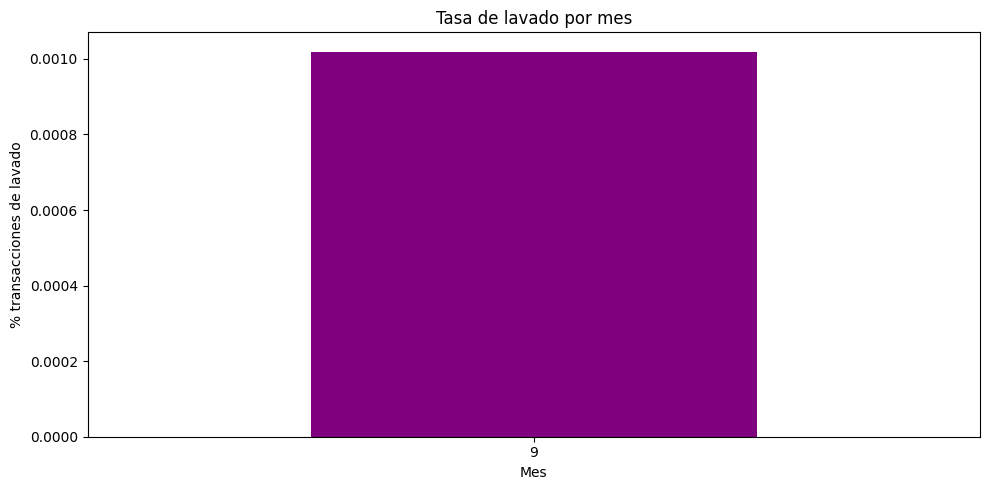

=== Tasa de lavado por hora (top 5) ===
Hour
12    0.001741
16    0.001608
11    0.001525
13    0.001517
14    0.001447
Name: Is Laundering, dtype: float64

=== Tasa de lavado por día ===
DayName
Sunday       0.003113
Saturday     0.002040
Monday       0.001327
Tuesday      0.001321
Wednesday    0.001174
Friday       0.000673
Thursday     0.000556
Name: Is Laundering, dtype: float64

=== Tasa de lavado por mes ===
Month
9    0.001019
Name: Is Laundering, dtype: float64


In [ ]:
# Parsear timestamp
trans['Timestamp'] = pd.to_datetime(trans['Timestamp'])
trans['Hour'] = trans['Timestamp'].dt.hour
trans['DayOfWeek'] = trans['Timestamp'].dt.dayofweek  # 0=Lunes, 6=Domingo
trans['DayName'] = trans['Timestamp'].dt.day_name()
trans['Month'] = trans['Timestamp'].dt.month

# Separar grupos
legit = trans[trans['Is Laundering'] == 0]
fraud = trans[trans['Is Laundering'] == 1]

# --- Transacciones por hora - Legítimo ---
plt.figure(figsize=(12, 5))
legit.groupby('Hour').size().plot(kind='bar', color='steelblue')
plt.title('Transacciones por hora - Legítimo')
plt.xlabel('Hora del día')
plt.ylabel('Número de transacciones')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# --- Transacciones por hora - Lavado ---
plt.figure(figsize=(12, 5))
fraud.groupby('Hour').size().plot(kind='bar', color='crimson')
plt.title('Transacciones por hora - Lavado')
plt.xlabel('Hora del día')
plt.ylabel('Número de transacciones')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# --- Tasa de lavado por hora ---
fraud_rate_hour = trans.groupby('Hour')['Is Laundering'].mean()

plt.figure(figsize=(12, 5))
fraud_rate_hour.plot(kind='bar', color='darkorange')
plt.title('Tasa de lavado por hora')
plt.xlabel('Hora del día')
plt.ylabel('% transacciones de lavado')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# --- Transacciones por día de la semana - Legítimo ---
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 5))
legit['DayName'].value_counts().reindex(day_order).plot(kind='bar', color='steelblue')
plt.title('Transacciones por día de la semana - Legítimo')
plt.xlabel('Día')
plt.ylabel('Número de transacciones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Transacciones por día de la semana - Lavado ---
plt.figure(figsize=(10, 5))
fraud['DayName'].value_counts().reindex(day_order).plot(kind='bar', color='crimson')
plt.title('Transacciones por día de la semana - Lavado')
plt.xlabel('Día')
plt.ylabel('Número de transacciones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Tasa de lavado por día de la semana ---
fraud_rate_day = trans.groupby('DayName')['Is Laundering'].mean().reindex(day_order)

plt.figure(figsize=(10, 5))
fraud_rate_day.plot(kind='bar', color='darkorange')
plt.title('Tasa de lavado por día de la semana')
plt.xlabel('Día')
plt.ylabel('% transacciones de lavado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Tasa de lavado por mes ---
fraud_rate_month = trans.groupby('Month')['Is Laundering'].mean()

plt.figure(figsize=(10, 5))
fraud_rate_month.plot(kind='bar', color='purple')
plt.title('Tasa de lavado por mes')
plt.xlabel('Mes')
plt.ylabel('% transacciones de lavado')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Stats en texto
print("=== Tasa de lavado por hora (top 5) ===")
print(fraud_rate_hour.sort_values(ascending=False).head())
print("\n=== Tasa de lavado por día ===")
print(fraud_rate_day.sort_values(ascending=False))
print("\n=== Tasa de lavado por mes ===")
print(fraud_rate_month.sort_values(ascending=False))

**Join de Tablas**

In [ ]:
# --- Join de las dos tablas ---

# El Account en trans corresponde a Account Number en accounts
# Hacemos dos joins: uno para la cuenta origen y otro para la cuenta destino

trans_merged = trans.merge(
    accounts.rename(columns={
        'Account Number': 'Account',
        'Bank Name': 'From Bank Name',
        'Bank ID': 'From Bank ID',
        'Entity ID': 'From Entity ID',
        'Entity Name': 'From Entity Name'
    }),
    on='Account',
    how='left'
)

trans_merged = trans_merged.merge(
    accounts.rename(columns={
        'Account Number': 'Account.1',
        'Bank Name': 'To Bank Name',
        'Bank ID': 'To Bank ID',
        'Entity ID': 'To Entity ID',
        'Entity Name': 'To Entity Name'
    }),
    on='Account.1',
    how='left'
)

print("Shape original:", trans.shape)
print("Shape después del join:", trans_merged.shape)
print("\nNulos tras el join:")
print(trans_merged.isnull().sum())
print("\nPrimeras filas:")
print(trans_merged.head())

Shape original: (5078345, 15)
Shape después del join: (5078415, 23)

Nulos tras el join:
Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
Hour                  0
DayOfWeek             0
DayName               0
Month                 0
From Bank Name        0
From Bank ID          0
From Entity ID        0
From Entity Name      0
To Bank Name          0
To Bank ID            0
To Entity ID          0
To Entity Name        0
dtype: int64

Primeras filas:
            Timestamp  From Bank    Account  To Bank  Account.1  \
0 2022-09-01 00:20:00         10  8000EBD30       10  8000EBD30   
1 2022-09-01 00:20:00       3208  8000F4580        1  8000F5340   
2 2022-09-01 00:00:00       3209  8000F4670     3209  8000F4670   
3 2022-09-01 00:02:00         12  8000F5030       12  8000F50

In [ ]:
# --- Investigar las 70 filas duplicadas ---

# Ver si hay duplicados en accounts
print("Duplicados en accounts por Account Number:")
print(accounts['Account Number'].duplicated().sum())

# Ver cuáles son las cuentas duplicadas
duplicated_accounts = accounts[accounts['Account Number'].duplicated(keep=False)]
print("\nCuentas duplicadas:")
print(duplicated_accounts.sort_values('Account Number'))

Duplicados en accounts por Account Number:
8

Cuentas duplicadas:
                        Bank Name  Bank ID Account Number  Entity ID  \
62794          Australia Bank #44    28248      80A7FD400  800D28430   
122088         Australia Bank #47    27755      80A7FD400  800CCD520   
61324          Australia Bank #44    28248      80A7FDE00  800D15C50   
124530         Australia Bank #47    27755      80A7FDE00  800D28430   
160206          Germany Bank #908   138832      80FA55EF0  8009067F0   
409360             Italy Bank #97    13858      80FA55EF0  8007F7670   
149001          Germany Bank #908   138832      80FA56340  8006CF910   
417905             Italy Bank #97    13858      80FA56340  80087BC70   
216212             Italy Bank #95     1490      81211BA20  80078A8D0   
505755          Germany Bank #945   142574      81211BA20  8007D4530   
216670             Italy Bank #95     1490      81211BC00  800884310   
505195          Germany Bank #945   142574      81211BC00  800970410  

In [ ]:
# Eliminar duplicados en accounts quedándonos con el primero
accounts_clean = accounts.drop_duplicates(subset='Account Number', keep='first')

print("Filas en accounts original:", len(accounts))
print("Filas en accounts limpio:", len(accounts_clean))

# Repetir el join con accounts limpio
trans_merged = trans.merge(
    accounts_clean.rename(columns={
        'Account Number': 'Account',
        'Bank Name': 'From Bank Name',
        'Bank ID': 'From Bank ID',
        'Entity ID': 'From Entity ID',
        'Entity Name': 'From Entity Name'
    }),
    on='Account',
    how='left'
)

trans_merged = trans_merged.merge(
    accounts_clean.rename(columns={
        'Account Number': 'Account.1',
        'Bank Name': 'To Bank Name',
        'Bank ID': 'To Bank ID',
        'Entity ID': 'To Entity ID',
        'Entity Name': 'To Entity Name'
    }),
    on='Account.1',
    how='left'
)

print("\nShape final:", trans_merged.shape)
print("Nulos:")
print(trans_merged.isnull().sum())

Filas en accounts original: 518581
Filas en accounts limpio: 518573

Shape final: (5078345, 23)
Nulos:
Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
Hour                  0
DayOfWeek             0
DayName               0
Month                 0
From Bank Name        0
From Bank ID          0
From Entity ID        0
From Entity Name      0
To Bank Name          0
To Bank ID            0
To Entity ID          0
To Entity Name        0
dtype: int64


Tipos de entidad origen:
From Entity Type
Sole Proprietorship    1790822
Partnership            1781375
Corporation            1409470
Country                  91852
Individual                4323
Direct                     503
Name: count, dtype: int64

Tipos de entidad destino:
To Entity Type
Partnership            1793513
Sole Proprietorship    1698678
Corporation            1511348
Country                  71576
Individual                3032
Direct                     198
Name: count, dtype: int64


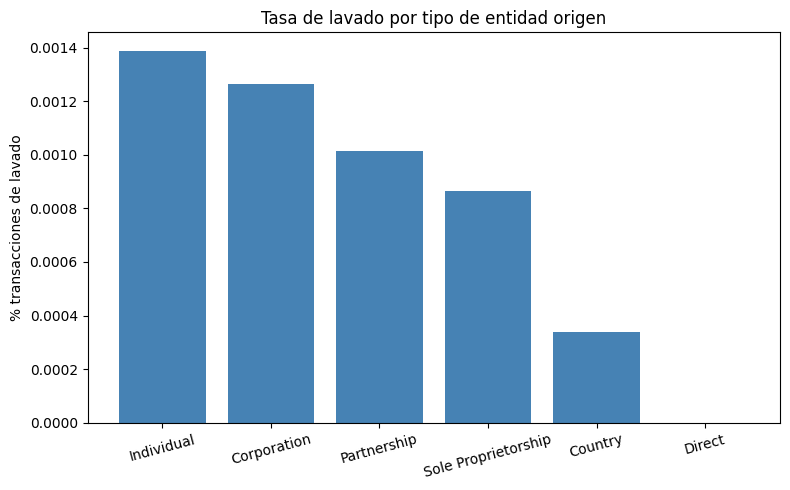

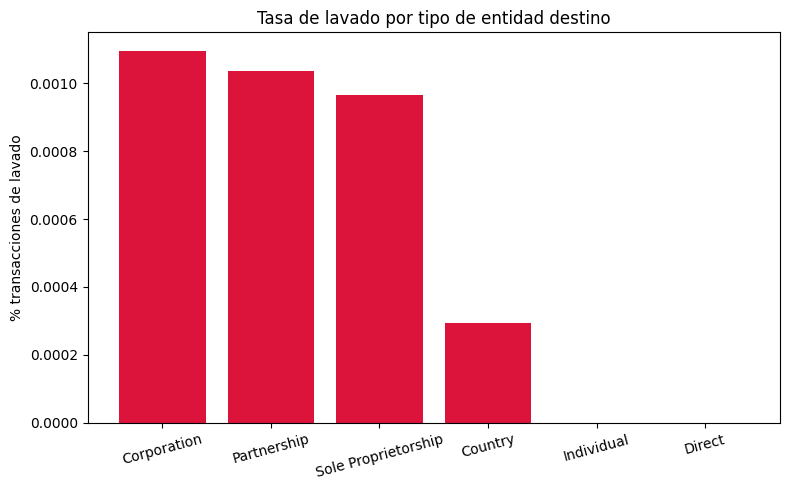

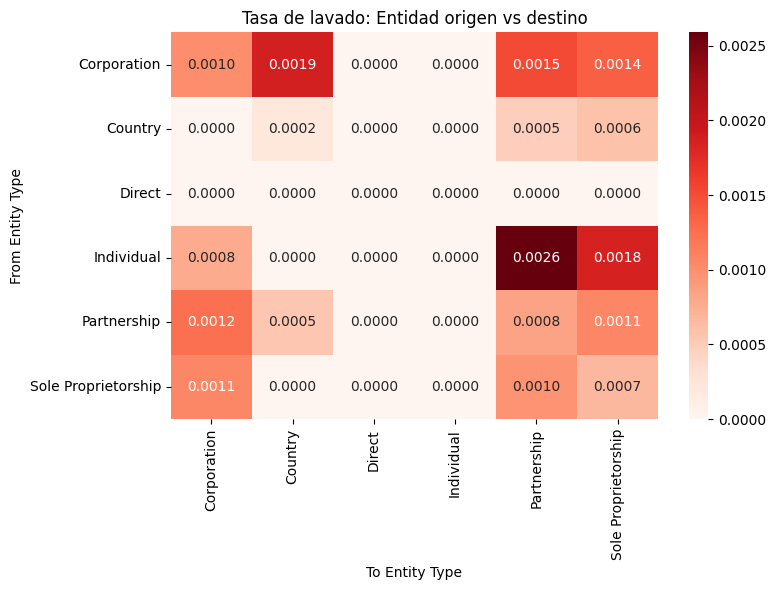


=== Tasa de lavado por entidad origen ===
From Entity Type
Individual             0.001388
Corporation            0.001265
Partnership            0.001013
Sole Proprietorship    0.000867
Country                0.000337
Direct                 0.000000
Name: Is Laundering, dtype: float64

=== Tasa de lavado por entidad destino ===
To Entity Type
Corporation            0.001096
Partnership            0.001037
Sole Proprietorship    0.000966
Country                0.000293
Individual             0.000000
Direct                 0.000000
Name: Is Laundering, dtype: float64


In [ ]:
# Extraer el tipo de entidad (Corporation, Partnership, Sole Proprietorship)
trans_merged['From Entity Type'] = trans_merged['From Entity Name'].str.extract(r'^([\w\s]+)\s#\d+')
trans_merged['To Entity Type'] = trans_merged['To Entity Name'].str.extract(r'^([\w\s]+)\s#\d+')

print("Tipos de entidad origen:")
print(trans_merged['From Entity Type'].value_counts())
print("\nTipos de entidad destino:")
print(trans_merged['To Entity Type'].value_counts())

# --- 1. Tasa de lavado por tipo de entidad origen ---
fraud_by_from_entity = trans_merged.groupby('From Entity Type')['Is Laundering'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
plt.bar(fraud_by_from_entity.index, fraud_by_from_entity.values, color='steelblue')
plt.title('Tasa de lavado por tipo de entidad origen')
plt.ylabel('% transacciones de lavado')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# --- 2. Tasa de lavado por tipo de entidad destino ---
fraud_by_to_entity = trans_merged.groupby('To Entity Type')['Is Laundering'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
plt.bar(fraud_by_to_entity.index, fraud_by_to_entity.values, color='crimson')
plt.title('Tasa de lavado por tipo de entidad destino')
plt.ylabel('% transacciones de lavado')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# --- 3. Tasa de lavado por combinación origen-destino ---
fraud_by_combo = trans_merged.groupby(['From Entity Type', 'To Entity Type'])['Is Laundering'].mean().unstack(fill_value=0)

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(fraud_by_combo, cmap='Reds', annot=True, fmt='.4f')
plt.title('Tasa de lavado: Entidad origen vs destino')
plt.tight_layout()
plt.show()

print("\n=== Tasa de lavado por entidad origen ===")
print(fraud_by_from_entity)
print("\n=== Tasa de lavado por entidad destino ===")
print(fraud_by_to_entity)

# **Data Cleaning**

In [ ]:
# --- Duplicados en trans_merged ---
print(f"\nFilas duplicadas en trans_merged: {trans_merged.duplicated().sum()}")

# --- Outliers en montos ---
print("\n=== Outliers en Amount Paid ===")
Q1 = trans_merged['Amount Paid'].quantile(0.25)
Q3 = trans_merged['Amount Paid'].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = (trans_merged['Amount Paid'] < (Q1 - 1.5 * IQR)) | (trans_merged['Amount Paid'] > (Q3 + 1.5 * IQR))
print(f"Outliers detectados: {outlier_mask.sum():,} ({outlier_mask.mean()*100:.2f}%)")
print(f"De esos outliers, cuántos son lavado: {trans_merged[outlier_mask]['Is Laundering'].sum():,}")
print(f"Tasa de lavado en outliers: {trans_merged[outlier_mask]['Is Laundering'].mean()*100:.3f}%")
print(f"Tasa de lavado en NO outliers: {trans_merged[~outlier_mask]['Is Laundering'].mean()*100:.3f}%")

# --- Transacciones con monto 0 o negativo ---
print("\n=== Montos sospechosos ===")
print(f"Transacciones con Amount Paid <= 0: {(trans_merged['Amount Paid'] <= 0).sum()}")
print(f"Transacciones con Amount Received <= 0: {(trans_merged['Amount Received'] <= 0).sum()}")
print(f"Monto mínimo Amount Paid: {trans_merged['Amount Paid'].min()}")

# --- Consistencia de divisas ---
print("\n=== Inconsistencia de divisas ===")
currency_mismatch = trans_merged[trans_merged['Payment Currency'] != trans_merged['Receiving Currency']]
print(f"Transacciones con divisa origen != destino: {len(currency_mismatch):,}")
print(f"Tasa de lavado en esas transacciones: {currency_mismatch['Is Laundering'].mean()*100:.3f}%")

# --- Transacciones donde origen == destino ---
print("\n=== Transacciones a uno mismo ===")
self_trans = trans_merged[trans_merged['Account'] == trans_merged['Account.1']]
print(f"Transacciones donde origen == destino: {len(self_trans):,}")
print(f"Tasa de lavado en esas transacciones: {self_trans['Is Laundering'].mean()*100:.3f}%")

# --- Consistencia Bank ID vs Bank Name ---
print("=== Consistencia Bank ID vs Bank Name ===")

# Un Bank ID debería tener siempre el mismo Bank Name y viceversa
bank_id_to_name = accounts_clean.groupby('Bank ID')['Bank Name'].nunique()
bank_name_to_id = accounts_clean.groupby('Bank Name')['Bank ID'].nunique()

print(f"Bank IDs con más de un Bank Name: {(bank_id_to_name > 1).sum()}")
print(f"Bank Names con más de un Bank ID: {(bank_name_to_id > 1).sum()}")

if (bank_id_to_name > 1).sum() > 0:
    print("\nBank IDs inconsistentes:")
    print(accounts_clean[accounts_clean['Bank ID'].isin(bank_id_to_name[bank_id_to_name > 1].index)])

if (bank_name_to_id > 1).sum() > 0:
    print("\nBank Names inconsistentes:")
    inconsistent_names = bank_name_to_id[bank_name_to_id > 1].index
    print(accounts_clean[accounts_clean['Bank Name'].isin(inconsistent_names)].sort_values('Bank Name').head(20))

# --- Valores raros en categóricas ---
print("\n=== Valores raros en categóricas ===")
cat_cols = ['Payment Format', 'Payment Currency', 'Receiving Currency', 'From Entity Type', 'To Entity Type']

for col in cat_cols:
    counts = trans_merged[col].value_counts()
    total = len(trans_merged)
    print(f"\n{col}:")
    for val, count in counts.items():
        pct = count / total * 100
        marker = " ⚠️ RARO" if pct < 0.1 else ""
        print(f"  {val}: {count:,} ({pct:.3f}%){marker}")

DATA CLEANING

Filas duplicadas en trans_merged: 9

=== Outliers en Amount Paid ===
Outliers detectados: 881,724 (17.36%)
De esos outliers, cuántos son lavado: 1,010
Tasa de lavado en outliers: 0.115%
Tasa de lavado en NO outliers: 0.099%

=== Montos sospechosos ===
Transacciones con Amount Paid <= 0: 0
Transacciones con Amount Received <= 0: 0
Monto mínimo Amount Paid: 1e-06

=== Inconsistencia de divisas ===
Transacciones con divisa origen != destino: 72,170
Tasa de lavado en esas transacciones: 0.000%

=== Transacciones a uno mismo ===
Transacciones donde origen == destino: 591,212
Tasa de lavado en esas transacciones: 0.002%


In [ ]:
trans_merged = trans_merged.drop_duplicates()
print(f"Filas tras eliminar duplicados: {len(trans_merged):,}")

Filas tras eliminar duplicados: 5,078,336


In [ ]:
print("\nData types:")
print(trans_merged.dtypes)


Data types:
Timestamp             datetime64[ns]
From Bank                      int64
Account                       object
To Bank                        int64
Account.1                     object
Amount Received              float64
Receiving Currency            object
Amount Paid                  float64
Payment Currency              object
Payment Format                object
Is Laundering                  int64
Hour                           int32
DayOfWeek                      int32
DayName                       object
Month                          int32
From Bank Name                object
From Bank ID                   int64
From Entity ID                object
From Entity Name              object
To Bank Name                  object
To Bank ID                     int64
To Entity ID                  object
To Entity Name                object
From Entity Type              object
To Entity Type                object
dtype: object


In [ ]:
object_cols = trans_merged.select_dtypes(include='object').columns
print("Valores únicos por columna object:")
for col in object_cols:
    print(f"  {col}: {trans_merged[col].nunique():,}")

Valores únicos por columna object:
  Account: 496,995
  Account.1: 420,636
  Receiving Currency: 15
  Payment Currency: 15
  Payment Format: 7
  DayName: 7
  From Bank Name: 20,053
  From Entity ID: 160,368
  From Entity Name: 160,368
  To Bank Name: 10,770
  To Entity ID: 165,280
  To Entity Name: 165,280
  From Entity Type: 6
  To Entity Type: 6


In [ ]:
# Convertir columnas con pocas categorías
low_cardinality = ['Receiving Currency', 'Payment Currency', 'Payment Format',
                   'DayName', 'From Entity Type', 'To Entity Type']

for col in low_cardinality:
    trans_merged[col] = trans_merged[col].astype('category')

print(trans_merged.dtypes)

Timestamp             datetime64[ns]
From Bank                      int64
Account                       object
To Bank                        int64
Account.1                     object
Amount Received              float64
Receiving Currency          category
Amount Paid                  float64
Payment Currency            category
Payment Format              category
Is Laundering                  int64
Hour                           int32
DayOfWeek                      int32
DayName                     category
Month                          int32
From Bank Name                object
From Bank ID                   int64
From Entity ID                object
From Entity Name              object
To Bank Name                  object
To Bank ID                     int64
To Entity ID                  object
To Entity Name                object
From Entity Type            category
To Entity Type              category
dtype: object


# **OLD CELLs**

In [ ]:
# Proporcion de laundering en el dataset completo
print("="*50)
print("PROPORCION DE LAUNDERING - DATASET COMPLETO")
print("="*50)

total = len(trans)
laundering = trans['Is Laundering'].sum()
no_laundering = total - laundering

print(f"\nTotal transacciones: {total:,}")
print(f"Laundering:          {laundering:,} ({laundering/total*100:.4f}%)")
print(f"No laundering:       {no_laundering:,} ({no_laundering/total*100:.4f}%)")

# Visualizacion rapida
import matplotlib.pyplot as plt

labels = ['No Laundering', 'Laundering']
sizes = [no_laundering, laundering]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Barras
axes[0].bar(labels, sizes, color=['steelblue', 'crimson'])
axes[0].set_title('Conteo de transacciones')
axes[0].set_ylabel('Cantidad')
for i, v in enumerate(sizes):
    axes[0].text(i, v + total*0.001, f'{v:,}', ha='center')

# Pie chart
axes[1].pie(sizes, labels=labels, autopct='%1.4f%%', colors=['steelblue', 'crimson'])
axes[1].set_title('Proporcion de laundering')

plt.tight_layout()
plt.show()

In [ ]:
drive.mount('/content/drive')

print("="*60)
print("CARGANDO DATOS")
print("="*60)

trans = pd.read_csv('/content/drive/MyDrive/Datasets/Final Project/HI-Small_Trans.csv')
cuentas = pd.read_csv('/content/drive/MyDrive/Datasets/Final Project/HI-Small_accounts.csv')

print("\n" + "="*60)
print("EXPLORACION INICIAL - TRANSACCIONES")
print("="*60)

print("\nPrimeras 5 filas:")
print(trans.head())

print("\nColumnas disponibles:")
print(trans.columns.tolist())

print("\nTipos de datos:")
print(trans.dtypes)

print("\nValores nulos:")
print(trans.isnull().sum())

print("\nEstadisticas basicas:")
print(trans.describe())

print("\n" + "="*60)
print("EXPLORACION INICIAL - CUENTAS")
print("="*60)

print("\nPrimeras 5 filas:")
print(cuentas.head())

print("\nColumnas disponibles:")
print(cuentas.columns.tolist())

print("\nTipos de datos:")
print(cuentas.dtypes)

print("\nValores nulos:")
print(cuentas.isnull().sum())

print("\n" + "="*60)
print("UNIENDO DATASETS")
print("="*60)

cuentas = cuentas.rename(columns={'Account Number': 'Account'})
datos_completos = trans.merge(cuentas, on='Account', how='left')

print(f"Dataset unido: {datos_completos.shape}")

print("\n" + "="*60)
print("VERIFICANDO CONSISTENCIA")
print("="*60)

cuentas_en_trans = set(trans['Account'].unique())
cuentas_en_cuentas = set(cuentas['Account'].unique())
faltantes = cuentas_en_trans - cuentas_en_cuentas
print(f"Cuentas en transacciones que no estan en cuentas: {len(faltantes)}")

print("\n" + "="*60)
print("SEPARANDO ENTRENAMIENTO/VALIDACION/PRUEBA")
print("="*60)

X = datos_completos.drop('Is Laundering', axis=1)
y = datos_completos['Is Laundering']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

print(f"Entrenamiento: {X_train.shape}")
print(f"Validacion: {X_valid.shape}")
print(f"Prueba: {X_test.shape}")

print("\nProporcion de lavado:")
print(f"Entrenamiento: {y_train.mean()*100:.2f}%")
print(f"Validacion: {y_valid.mean()*100:.2f}%")
print(f"Prueba: {y_test.mean()*100:.2f}%")

print("\n" + "="*60)
print("LIMPIANDO DATOS")
print("="*60)

def limpiar_datos(df, parametros=None, modo='entrenamiento'):

    df_clean = df.copy()

    if modo == 'entrenamiento':
        parametros = {}

        # Guardar parametros para imputacion
        for col in ['Amount Received', 'Amount Paid']:
            if col in df_clean.columns:
                parametros[f'mediana_{col}'] = df_clean[col].median()
                print(f"Mediana de {col}: {parametros[f'mediana_{col}']:.2f}")

        for col in ['Receiving Currency', 'Payment Currency', 'Payment Format']:
            if col in df_clean.columns:
                parametros[f'moda_{col}'] = df_clean[col].mode()[0]
                print(f"Moda de {col}: {parametros[f'moda_{col}']}")

    # Aplicar limpieza

    # 1. Rellenar nulos en montos
    for col in ['Amount Received', 'Amount Paid']:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].fillna(parametros[f'mediana_{col}'])

    # 2. Rellenar nulos en texto
    for col in ['Receiving Currency', 'Payment Currency', 'Payment Format']:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].fillna('Desconocido')

    # 3. Procesar fechas
    if 'Timestamp' in df_clean.columns:
        df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'], errors='coerce')
        df_clean['Año'] = df_clean['Timestamp'].dt.year
        df_clean['Mes'] = df_clean['Timestamp'].dt.month
        df_clean['Dia'] = df_clean['Timestamp'].dt.day

    # 4. Limpiar texto
    for col in df_clean.select_dtypes(include=['object']).columns:
        df_clean[col] = df_clean[col].astype(str).str.strip()

    # 5. Corregir montos negativos
    for col in ['Amount Received', 'Amount Paid']:
        if col in df_clean.columns:
            negativos = (df_clean[col] < 0).sum()
            if negativos > 0:
                df_clean.loc[df_clean[col] < 0, col] = df_clean[col].abs()
                print(f"Se corrigieron {negativos} valores negativos en {col}")

    if modo == 'entrenamiento':
        return df_clean, parametros
    else:
        return df_clean

print("\nLimpiando conjunto de entrenamiento...")
X_train_clean, params = limpiar_datos(X_train, modo='entrenamiento')

print("\nLimpiando conjunto de validacion...")
X_valid_clean = limpiar_datos(X_valid, parametros=params, modo='validacion')

print("\nLimpiando conjunto de prueba...")
X_test_clean = limpiar_datos(X_test, parametros=params, modo='prueba')

print("\n" + "="*60)
print("VERIFICANDO LIMPIEZA")
print("="*60)

print("\nNulos en entrenamiento:")
print(X_train_clean.isnull().sum().sum())

print("\nNulos en validacion:")
print(X_valid_clean.isnull().sum().sum())

print("\nNulos en prueba:")
print(X_test_clean.isnull().sum().sum())

print("\n" + "="*60)
print("PREPARANDO DATASETS FINALES")
print("="*60)

train_final = pd.concat([X_train_clean, y_train.to_frame('Is Laundering')], axis=1)
valid_final = pd.concat([X_valid_clean, y_valid.to_frame('Is Laundering')], axis=1)
test_final = pd.concat([X_test_clean, y_test.to_frame('Is Laundering')], axis=1)

print(f"Entrenamiento final: {train_final.shape}")
print(f"Validacion final: {valid_final.shape}")
print(f"Prueba final: {test_final.shape}")

print("\n" + "="*60)
print("GUARDANDO ARCHIVOS")
print("="*60)

train_final.to_csv('/content/drive/MyDrive/Datasets/Final Project/train_limpio.csv', index=False)
valid_final.to_csv('/content/drive/MyDrive/Datasets/Final Project/valid_limpio.csv', index=False)
test_final.to_csv('/content/drive/MyDrive/Datasets/Final Project/test_limpio.csv', index=False)

print("Archivos guardados:")
print("- train_limpio.csv")
print("- valid_limpio.csv")
print("- test_limpio.csv")

print("\n" + "="*60)
print("RESUMEN FINAL")
print("="*60)

print(f"""
Datos originales:
- Transacciones: {trans.shape}
- Cuentas: {cuentas.shape}

Datos limpios:
- Entrenamiento: {train_final.shape}
- Validacion: {valid_final.shape}
- Prueba: {test_final.shape}

Proporcion de lavado: 0.10% en todos los conjuntos
""")

In [ ]:
# Ver columnas actuales de cuentas
print(cuentas.columns.tolist())

# Investigar duplicados
print("\nDuplicados en archivo de cuentas:")
print(cuentas.duplicated(subset=['Account']).sum())

print("\nEjemplos de cuentas duplicadas:")
print(cuentas[cuentas.duplicated(subset=['Account'], keep=False)].head(10))